<a href="https://colab.research.google.com/github/Sanskruti-Shimple/Temperature-Sensor-Failure-Detection-and-Diagnosis-Based-on-the-ARIMA-Model/blob/main/Thermistor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
def parser(x):
    return datetime.strptime(x,'%H:%M:%S')

pro = pd.read_csv('healthya.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 07:52:50,21.03
1900-01-01 07:52:51,21.20
1900-01-01 07:52:53,21.34
1900-01-01 07:52:54,21.54
1900-01-01 07:52:56,21.71


Text(0, 0.5, 'Temperature')

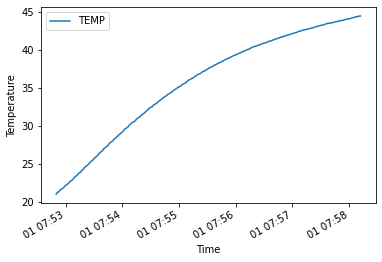

In [ ]:
pro.plot()
plt.xlabel("Time")
plt.ylabel("Temperature")
# plt.plot(x1, y1, label = "line 1")
# plt.plot(x2, y2, label = "line 2")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


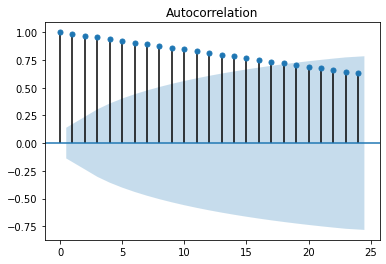

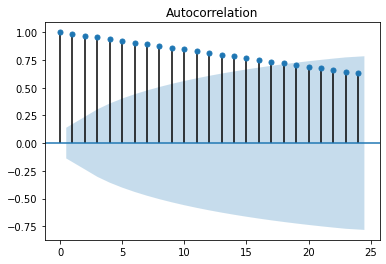

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pro)


##Converting series to stationary

In [ ]:
pro.head()

,TEMP
TIME,
1900-01-01 07:52:50,21.03
1900-01-01 07:52:51,21.20
1900-01-01 07:52:53,21.34
1900-01-01 07:52:54,21.54
1900-01-01 07:52:56,21.71


In [ ]:
pro.shift(1)

,TEMP
TIME,
1900-01-01 07:52:50,NaN
1900-01-01 07:52:51,21.03
1900-01-01 07:52:53,21.20
1900-01-01 07:52:54,21.34
1900-01-01 07:52:56,21.54
...,...
1900-01-01 07:58:06,44.26
1900-01-01 07:58:08,44.33
1900-01-01 07:58:10,44.36


In [ ]:
pro_diff = pro.diff(periods=1)
pro_diff = pro_diff[1:]
pro_diff.head()

,TEMP
TIME,
1900-01-01 07:52:51,0.17
1900-01-01 07:52:53,0.14
1900-01-01 07:52:54,0.20
1900-01-01 07:52:56,0.17
1900-01-01 07:52:58,0.17


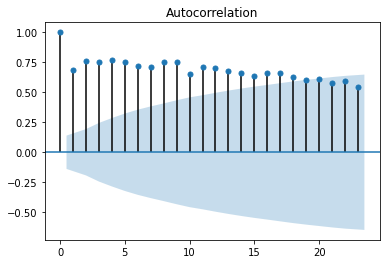

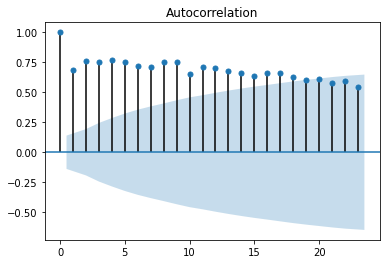

In [ ]:
plot_acf(pro_diff)

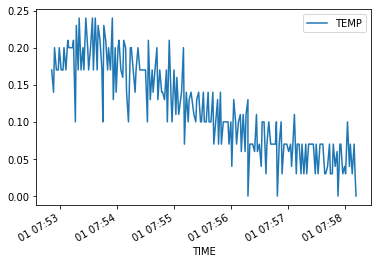

In [ ]:
pro_diff.plot()

In [ ]:
X = pro.values
train = X[0:149] # 149 data as train data
test = X[150:]  # 50 data as test data
predictions = []
print(train.size)
print(test.size)

149
50


##Autoreggresive AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
predictions = model_ar_fit.predict(start=149,end=200)

##ARIMA model

In [ ]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(3, 1, 3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic) #lesser the aic values better is the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


-618.7240019228709


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

array([41.80672007, 41.87967926, 41.95003568, 42.02029917, 42.09080524,
       42.16163526, 42.23284027, 42.30446702, 42.37656097, 42.44916663,
       42.52232758, 42.59608639, 42.67048465, 42.74556293, 42.82136074,
       42.89791649, 42.97526751, 43.05344999, 43.13249899, 43.21244839,
       43.29333088, 43.37517794, 43.45801986, 43.54188567, 43.62680316,
       43.71279886, 43.79989803, 43.88812464, 43.97750138, 44.06804964,
       44.15978951, 44.25273977, 44.3469179 , 44.44234004, 44.53902105,
       44.63697446, 44.73621249, 44.83674605, 44.93858475, 45.04173689,
       45.14620949, 45.25200828, 45.3591377 , 45.46760093, 45.5773999 ,
       45.68853529, 45.80100653, 45.91481184, 46.02994825, 46.14641157])

ValueError: ignored

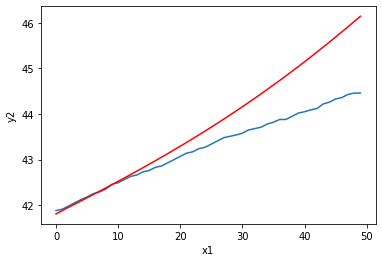

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.xlabel("x1")
plt.ylabel("y2")
plt.plot(X, test, color='g', label='sin')
plt.plot(X, predictions, color='r', label='cos')

In [ ]:
mean_squared_error(test,predictions)

In [ ]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

In [ ]:
predictions= model_arima_fit.forecast(steps=50)[0]
predictions

In [ ]:
 df = pd.DataFrame(predictions)  #to arrange data like excel sheet
 df.columns = ["TEMP"]
 df

In [ ]:
df.to_csv('prediction.csv') 

In [ ]:
prediction = pd.read_csv('/content/prediction.csv')
unhealthy=pd.read_csv('/content/unhealthyar.csv')
print(prediction)
print(unhealthy)

In [ ]:
i=1
j=0
k=0
z=unhealthy['INDEX'][unhealthy.index[-1]]

while (i <z):
    a= ((prediction['TEMP'][i]-unhealthy['TEMP'][i]))
    if (a>3):
        j=j+1
        if(j>=2):
            print("wire is loose ,error occured",end=" ")
            print(j,end=" ")
            print("times")
            
    # if (0.8<a<2):
    #     k=k+1
    #     if (k>=2):
    #         print("some insulation is done on sensor ",end=" ")
    #         print(k,end=" ")
    #         print("times")
    # if (a>1.5):
    #     k=k+1
    #     if (k>=2):
    #         print("wire has been removed ",end=" ")
    #         print(k,end=" ")
    #         print("times")        
    i=i+1
    

In [ ]:
plt.plot(unhealthy["TEMP"])
plt.plot(predictions,color='red')